In this notebook we explore the [emotion dataset](https://huggingface.co/datasets/dair-ai/emotion) (doi:10.18653/v1/D18-1404) for which we want to create a classifier model. This dataset contains tweets in english language and labels them with one of the six emotions anger, fear, joy, love, sadness, and surprise. In its split variant, we have a training split of 16 000 tweets, a validation split of 2 000 tweets and a test split of 2 000 tweets.

# Load Dataset

In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd

# allow for completely displaying tweets
pd.options.display.max_colwidth = 280

In [2]:
emotion = load_dataset('emotion')
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

# Explore Entries

Here we just look into the dataset to get a feeling for it.

In [4]:
label_names = emotion['train'].features['label'].names

def label_int2str(row):
    return emotion['train'].features['label'].int2str(row)

def labeled_df_from_dataset(dataset):
    dataset.set_format('pandas')
    
    df = dataset[:]
    df['label_name'] = df['label'].apply(label_int2str)
    
    dataset.reset_format()
    
    return df

In [5]:
df = labeled_df_from_dataset(emotion['train'])
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,2,love
4,i am feeling grouchy,3,anger


And also look at some random entries.

In [6]:
df.sample(5)

,text,label,label_name
8503,i don t want this to end just like i didn t want the series rock chicks to end but i feel like ka will keep on bringing us amazing stories with wonderful women and sexy men,1,joy
10504,i am feeling a little sarcastic today,3,anger
14608,i had felt kind of ick but just figured it was nerves or feeling anxious,4,fear
11371,i was thinking about going out to dinner but im feeling like i might not be bothered too,3,anger
15590,i do sometimes feel as if i am a little unsure of who i am and how independent i really am,4,fear


# Analyze Contents

Here we analyze the some more quantifiable properties. First we check if the dataset is balanced. We do this for all splits of the dataset, just to be sure there are no surprises down the line.

In [7]:
def plot_label_distribution(dataset):
    df = labeled_df_from_dataset(dataset)
    df['label_name'].value_counts(ascending=True).plot.barh()
    plt.ylabel('')

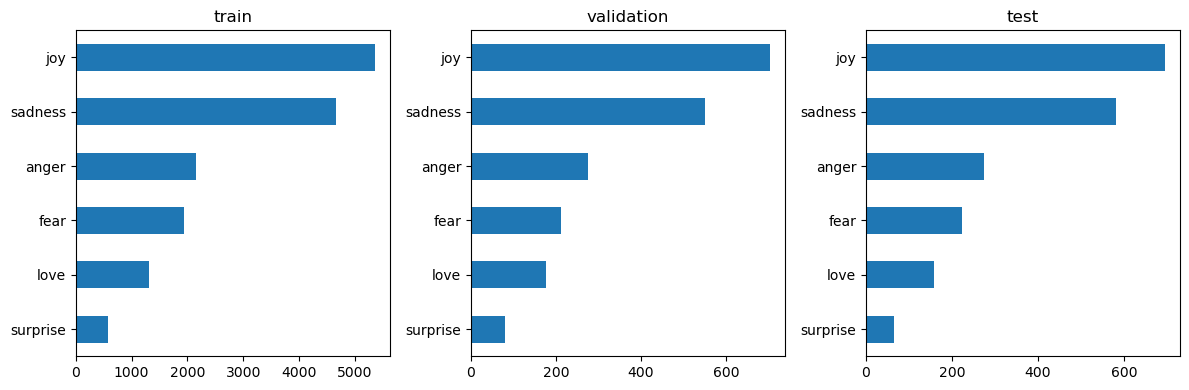

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_label_distribution(emotion['train'])
plt.title('train')

plt.subplot(132)
plot_label_distribution(emotion['validation'])
plt.title('validation')

plt.subplot(133)
plot_label_distribution(emotion['test'])
plt.title('test')

plt.tight_layout()
plt.show()

Now we also check if there are some significant differences in the tweet lengths for some of the emotion labels.

In [10]:
def plot_word_count_boxplot(dataset):
    df = labeled_df_from_dataset(dataset)
    df['word_count'] = df['text'].str.split().apply(len)
    df.boxplot('word_count', by='label_name', showfliers=False, grid=False, color='k')
    plt.suptitle('')
    plt.xlabel('')

Text(0.5, 1.0, 'test')

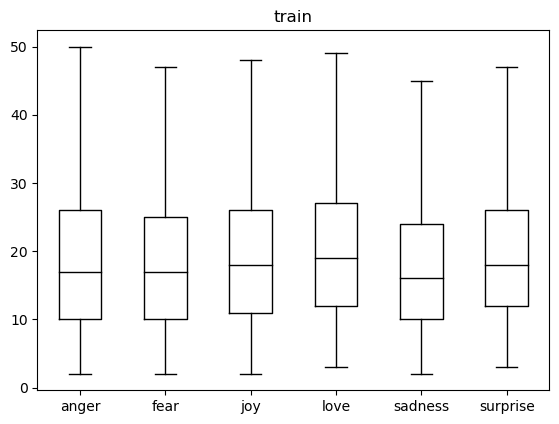

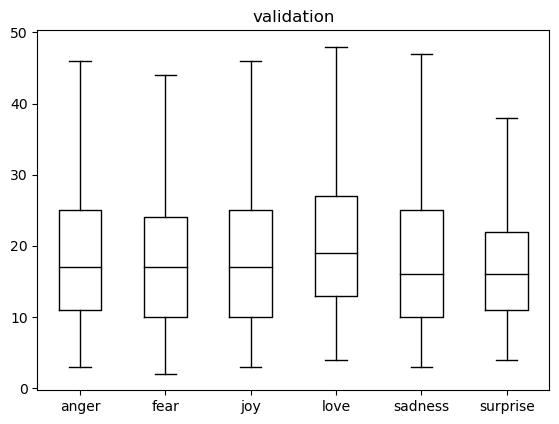

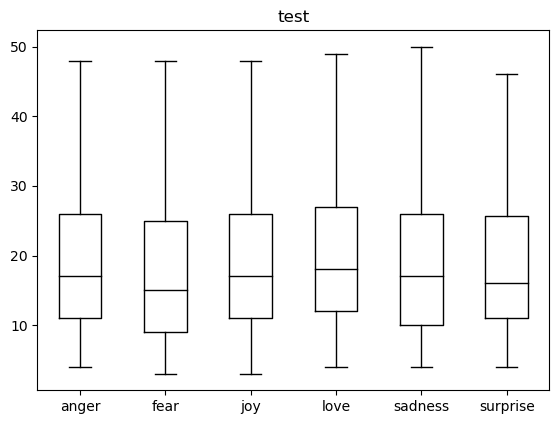

In [50]:
plot_word_count_boxplot(emotion['train'])
plt.title('train')

plot_word_count_boxplot(emotion['validation'])
plt.title('validation')

plot_word_count_boxplot(emotion['test'])
plt.title('test')

So the data is not balanced in the labels, but there is no significant difference in tweet lengths between label classes or splits.